<a href="https://colab.research.google.com/github/MrIceAreBee11/MrIceAreBee11/blob/main/Assignment_Week_9_1301213316.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 9**

**Nama : Satya Rayyis Baruna**

**Kelas : IF-45-DSIS.02**

**NIM : 1301213316**

# **Dataset Kredivo**

Dataset ini merupakan kumpulan ulasan pengguna tentang Kredivo, sebuah aplikasi fintech yang menyediakan layanan kredit digital di Indonesia. Kredivo menawarkan berbagai layanan termasuk pembiayaan dan cicilan online dengan proses persetujuan cepat (sekitar 5 menit), pembayaran di lebih dari 4000 merchant baik online maupun offline, serta cicilan tanpa kartu kredit dan tanpa DP.

Aplikasi ini terintegrasi dengan berbagai platform e-commerce besar seperti Tokopedia, Shopee, dan Lazada, serta merchant retail seperti Indomaret, Alfamart, dan IKEA. Selain itu, Kredivo juga menyediakan layanan pembayaran tagihan, pembelian voucher game, layanan streaming, dan pinjaman dana melalui KrediFazz. Dataset ini dapat dimanfaatkan untuk berbagai analisis seperti sentimen pengguna, identifikasi pola keluhan, dan evaluasi kualitas layanan.

sc : https://www.kaggle.com/datasets/nuricahyono/kredivo

In [7]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
# Download required NLTK data
nltk.download('stopwords')

# Read the dataset
path = "/content/drive/MyDrive/Semester 7/Visualisasi Data/Assignment9/Kredivo.csv"

# Deteksi encoding file

# Read the CSV file
df = pd.read_csv(path)

# Combine all reviews into one text
text = ' '.join(df['content'].astype(str))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
# Text preprocessing
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text
# Clean the text
cleaned_text = clean_text(text)

In [62]:
# Stop words dalam bahasa Indonesia dan kata-kata umum dalam ulasan positif
stop_words = set(stopwords.words('indonesian'))
custom_stop_words = {
    'buruk', 'lama', 'masalah', 'tidak', 'kecewa', 'jelek', 'susah', 'ribet', 'terlalu',
    'mengecewakan', 'kurang', 'tidak bagus', 'tidak puas', 'payah', 'pelayanan buruk',
    'sulit', 'error', 'penipuan', 'bohong', 'penyelesaian', 'gagal', 'tolak', 'aneh', 'yang', 'yg',
    'tp', 'tapi', 'kalo', 'sy', 'sya', 'saya', 'lg', 'd', 'biar', 'klo', 'udh', 'udah', 'sdh', 'ditolak',
    'aja', 'tolong', 'pake', 'kali', 'sih', 'karena', 'mohon', 'karna', "g", 'dah', 'telat', 'tdk', 'gk',
    'pak', 'ga', 'c', 'salah', 'tau', 'blm'
}
stop_words.update(custom_stop_words)

In [63]:
# Create and generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words,
    max_words=100,
    colormap='viridis',
    contour_width=3,
    contour_color='steelblue'
).generate(cleaned_text)

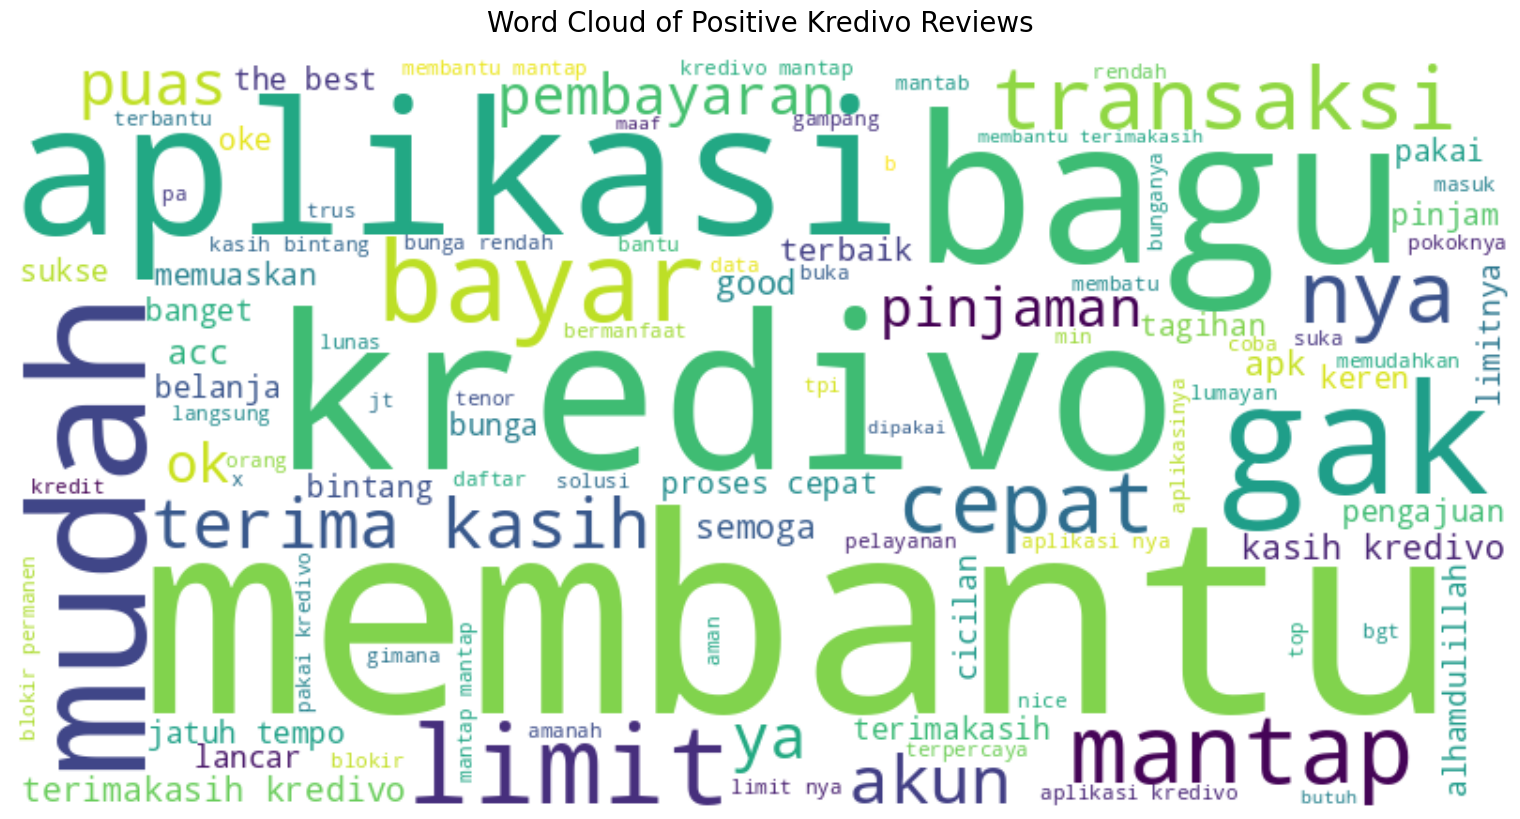

In [64]:
# Menampilkan Word Cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Kredivo Reviews', fontsize=20, pad=20)
plt.tight_layout(pad=0)
plt.savefig('wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()

In [45]:
from collections import Counter
words = cleaned_text.split()
word_freq = Counter(words)
word_freq = {word: count for word, count in word_freq.items() if word not in stop_words}

# Menampilkan 10 kata yang paling sering muncul
print("\nTop 10 kata paling sering muncul:")
for word, count in sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{word}: {count}")


Top 10 kata paling sering muncul:
membantu: 19033
kredivo: 18101
aplikasi: 8811
nya: 7558
limit: 6738
yg: 5467
bayar: 4594
kasih: 4374
gak: 4136
ga: 4074


Berdasarkan hasil visualisasi wordcloud dari ulasan positif tentang Kredivo ini, kita dapat melihat beberapa kata yang paling sering muncul dalam ulasan positif yang diberikan oleh pengguna. Berikut adalah beberapa hal yang dapat saya analisis:

1. Kata "kredivo": Kata ini muncul dominan, menandakan bahwa ulasan banyak menyebut nama aplikasi, menunjukkan fokus dan relevansi ulasan pada aplikasi Kredivo sebagai layanan yang mereka gunakan.

2. Kata-kata positif seperti "membantu," "baik," "bagus," "mantap," dan "puas": Kata-kata ini menunjukkan apresiasi pengguna terhadap layanan Kredivo. Ini mengindikasikan bahwa banyak pengguna merasa puas dengan pelayanan dan kualitas Kredivo.

3. Kata-kata yang berhubungan dengan kemudahan dan kecepatan, seperti "mudah," "cepat," "proses," dan "transaksi": Ini mengindikasikan bahwa salah satu aspek utama yang diapresiasi pengguna dari Kredivo adalah kemudahan dalam penggunaan serta proses transaksi yang cepat dan efisien.

4. Kata "limit" dan "bayar": Banyak pengguna menyebutkan "limit," yang menunjukkan bahwa fitur batas kredit atau pinjaman adalah salah satu fitur yang sering dibicarakan. Kata "bayar" juga sering muncul, yang mengindikasikan bahwa layanan pembayaran atau cicilan adalah topik yang banyak dibahas dalam ulasan.

5. Ekspresi terima kasih seperti "terimakasih" atau "terima kasih": Pengguna menunjukkan rasa terima kasih atau kepuasan mereka dengan layanan yang diterima, yang mengindikasikan tingkat kepuasan tinggi.

Secara keseluruhan, ini menunjukkan sebagian besar ulasan positif terkait dengan kemudahan, kecepatan, dan fleksibilitas dalam layanan Kredivo. Pengguna mengapresiasi fitur yang memudahkan transaksi dan memberikan limit kredit yang sesuai dengan kebutuhan mereka.
